# Lecture 16  - Fourier transforms

"The Fourier transform (FT) decomposes a function of time (a signal) into the frequencies that make it up, in a way similar to how a musical chord can be expressed as the frequencies (or pitches) of its constituent notes." ([Wikipedia][1])

A signal in the time domain $h(t)$ is represented by a generally complex function in the frequency domain $H(f),\ (-\infty<f<\infty),$ by the pair of integrals
$$\begin{array}{c}
H(f) &=& \int_{-\infty}^{\infty}h(t)e^{2\pi i ft}dt\\[10pt]
h(t) &=& \int_{-\infty}^{\infty}H(f)e^{-2\pi i ft}df
\end{array}$$

In most uses of the compuational Fourier transform, we will not be evaluating these integrals. Instead, we will be taking Fourier transforms of discretely sampled data where
$$h(t)\approx h(k\Delta) \sim h_k, \ \ k=\dots,-2,-1,0,+1,+2,\dots$$
with the sampling rate $1/\Delta$ in equally spaced steps $\Delta$

The [discrete Fourier transform][2] **(DFT)** is defined as
$$\begin{array}{c}
H_n = H(f_n) &=& \sum_{k=0}^{N-1}h_ke^{2\pi i f_nt_k}\\[10pt]
h_k = h(t_k) &=& \sum_{k=0}^{N-1}H_ne^{-2\pi i f_nt_k}
\end{array}$$
and is usually computed by the [Fast Fourier Transform][3] (FFT) method.

In this sense, the DFT is more alike a [Fourier series][5] than a Fourier transform. In a Fourier series, one cycle (or period) of a summation of sinusoidal functions can be made to approximate an arbitrary function in that interval (or the entire function if it is also periodic). 

The main use in computational physics of a DFT is [Fourier analysis][6], or the process of decomposing a function (ie. data signal) into oscillatory components. (The operation of rebuilding the function from these pieces is known as *Fourier synthesis.*) There are [many applications][7] of Fourier analysis in all branches of physics.

#### Things to note.

There are some unique details about the FFT and discrete signal sampling. 

1. If $h(t)$ has no frequencies above the [Nyquist frequency][4]  $$f_N=\frac{1}{2\Delta}$$ then the sampled data $h_k$ completely determines $h(t)$. 

2. If $h(t)$ does have frequency components above $f_N$, then the transform $H_n$ is aliased with higher frequencies falsely merged into the frequency domain below $f_N$.

3. Since there are only $N$ data points of $h_k$, the frquencies computed by the FFT are
$$f_n=\frac{n}{N\Delta},\ \ n=\frac{-N}{2}\dots\frac{N}{2}$$

[1]: https://en.wikipedia.org/wiki/Fourier_transform
[2]: https://en.wikipedia.org/wiki/Discrete_Fourier_transform
[3]: https://en.wikipedia.org/wiki/Fast_Fourier_transform
[4]: https://en.wikipedia.org/wiki/Nyquist%E2%80%93Shannon_sampling_theorem
[5]: https://en.wikipedia.org/wiki/Fourier_series
[6]: https://en.wikipedia.org/wiki/Fourier_analysis
[7]: https://en.wikipedia.org/wiki/Fourier_analysis#Applications

In [13]:
import numpy
import scipy.fft
%matplotlib inline
import matplotlib.pyplot as plot
plot.style.use('seaborn')

#### Example 1

Take the DFT of a simple cosine function.

SciPy’s FFT algorithms gain their speed by a recursive divide and conquer strategy. This relies on efficient functions for small prime factors of the [input length][1]. Thus, the transforms are fastest when using composites of the prime factors handled by the fft implementation. 

Also, when using `numpy.linspace` is it **important** to use `restep=True` in order to make certain the step size is as constant and accurate as possible.

[1]: https://docs.scipy.org/doc/scipy/reference/generated/scipy.fft.next_fast_len.html

In [14]:
input_size = 10002
print("Pad out the data until it is size: ", scipy.fft.next_fast_len(input_size))

Pad out the data until it is size:  10080


In [15]:
# -- Create a example time data series of simple cosine.
# -- 
# -- Normally the sampling rate is determined by your equipment, therefore
# -- a fixed amount of data (a constant N) determines how long the 
# -- data collection lasts, regardless of the underlying signal frequency.
# -- 
# -- In this case, we specify N, sample frequency, and sampling_rate
sampling_rate = 800                   # Hz 
#N             = 2**12                 # power of 2, or
N             = scipy.fft.next_fast_len(25000) # any number you want
signal_freq   = 5                     # Hz

delta_t       = 1.0/sampling_rate                       # seconds
t_min = 0.0                                             # seconds
t_max = (N-1) * delta_t                                 # seconds     
t, delta_t = numpy.linspace(t_min,t_max,N,retstep=True) # seconds
cycles = signal_freq * t_max                            # float

print(f"Length of time   : {t_max:4.3f} seconds.")
print(f"Number of cycles : {cycles:4.3f} cycles.")

# -- Create a complex array, but set the imaginary part to 0
h = numpy.cos(2.0*numpy.pi*signal_freq*t)+0.0*(1.0j)
print(f"h[0]=({h[0].real:.2f} + {h[0].imag:.2f}i)")
print(f"h[1]=({h[1].real:.2f} + {h[1].imag:.2f}i)")

Length of time   : 31.249 seconds.
Number of cycles : 156.244 cycles.
h[0]=(1.00 + 0.00i)
h[1]=(1.00 + 0.00i)


In [16]:
# -- Create a example time data series of simple cosine.
# -- 
# -- To set the data h(t) to a exact number of cycles within a fixed
# -- number of sampling points, you have to calulate the sampling_rate last.
# -- You also do not want the last point of the data range 
# -- because is should be the start of the next cycle.
# -- 
# -- In this case, we specify N, sample frequency, and number of cycles
cycles        = 6                      # integer
#N             = 2**11                 # power of 2, or
N             = scipy.fft.next_fast_len(25000) # any number you want
signal_freq   = 5                      # Hz
 
t_min = 0.0                                                            # seconds
t_max = cycles/signal_freq                                             # seconds
t, delta_t = numpy.linspace(t_min,t_max,N,retstep=True,endpoint=False) # seconds
sampling_rate = 1.0/delta_t                                            # Hz

print(f"Length of time   : {t_max:4.3f} seconds.")
print(f"Sampling rate    : {sampling_rate:4.3f} Hz.")

# -- Create a complex array, but set the imaginary part to 0
h = numpy.cos(2*numpy.pi*signal_freq*t) + 2 * numpy.cos(4*numpy.pi*signal_freq*t) + 5 * numpy.cos(7*numpy.pi*signal_freq*t)
print(f"h[0]=({h[0].real:.2f} + {h[0].imag:.2f}i)")
print(f"h[1]=({h[1].real:.2f} + {h[1].imag:.2f}i)")

Length of time   : 1.200 seconds.
Sampling rate    : 20833.333 Hz.
h[0]=(8.00 + 0.00i)
h[1]=(8.00 + 0.00i)


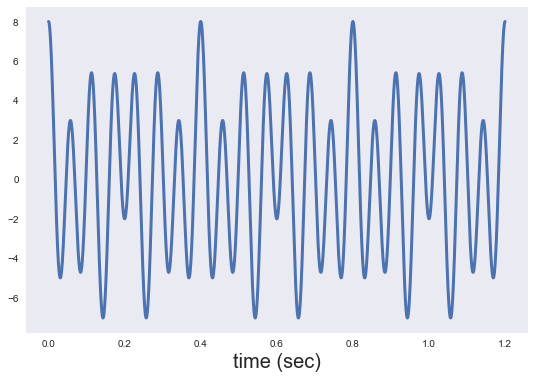

In [17]:
plot.figure(figsize=(9,6))
plot.plot(t,numpy.real(h),linewidth=3)
plot.xlabel("signal", fontsize=20)
plot.xlabel("time (sec)", fontsize=20)
plot.grid()
plot.show()
plot.close()

In [18]:
# -- Take the DFT and determine the frequencies of the points
H=scipy.fft.fft(h)
f=scipy.fft.fftfreq(H.size, delta_t)

print(f"Amplitude of the zero frequency             : ({H[0].real:.2f} + {H[0].imag:.2f}i)")
print(f"Amplitude of the lowest positive frequency  : ({H[1].real:.2f} + {H[1].imag:.2f}i)")
print(f"Amplitude of the highest positive frequency : ({H[N//2-1].real:.2f} + {H[N//2-1].imag:.2f}i)")
print(f"Amplitude of the lowest negative frequency  : ({H[N-1].real:.2f} + {H[N-1].imag:.2f}i)")
print(f"Amplitude of the highest negative frequency : ({H[N//2].real:.2f} + {H[N//2].imag:.2f}i)")

# -- A real and even h(t) should yeild real and even H(f)
print("Real?", numpy.all(numpy.isreal(H)))
print("Real part even?", numpy.allclose(numpy.real(H[1:N//2]),numpy.real(H[N-1:N//2:-1])))
# -- A real h(t) should yeild H(-f)=H(f)^*
print("Complex conjugate even?",numpy.allclose(numpy.conj(H[1:N//2]),H[N-1:N//2:-1]))


H=scipy.fft.fftshift(H)
f=scipy.fft.fftshift(f)

Amplitude of the zero frequency             : (-0.00 + -0.00i)
Amplitude of the lowest positive frequency  : (-0.00 + -0.00i)
Amplitude of the highest positive frequency : (0.00 + 0.00i)
Amplitude of the lowest negative frequency  : (-0.00 + 0.00i)
Amplitude of the highest negative frequency : (-0.00 + -0.00i)
Real? False
Real part even? True
Complex conjugate even? True


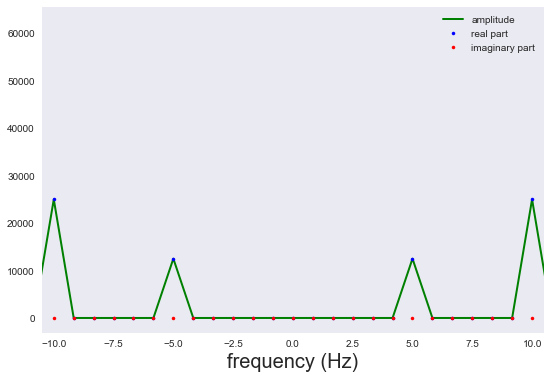

In [19]:
plot.figure(figsize=(9,6))
plot.plot(f,numpy.abs(H), "g-", linewidth=2, label="amplitude")
plot.plot(f,numpy.real(H),"b.", linewidth=2, label="real part")
plot.plot(f,numpy.imag(H),"r.", linewidth=2, label="imaginary part")
plot.xlim(-2.1*signal_freq,2.1*signal_freq)
plot.legend()
plot.xlabel("amplitude", fontsize=20)
plot.xlabel("frequency (Hz)", fontsize=20)
plot.grid()
plot.show()
plot.close()

The [discrete cosine transform][1] is one  is a widely used transformation technique in signal processing and data compression. Its a preferred method for real-only DFT, as it generally requires fewer basis functions, and assumes the extended signal is symmetric at the boundary.

[1]: https://en.wikipedia.org/wiki/Discrete_cosine_transform

Amplitude of the zero frequency    : -16.00
Amplitude of the lowest frequency  : 16.03
Amplitude of the highest frequency : -0.00
Real? True


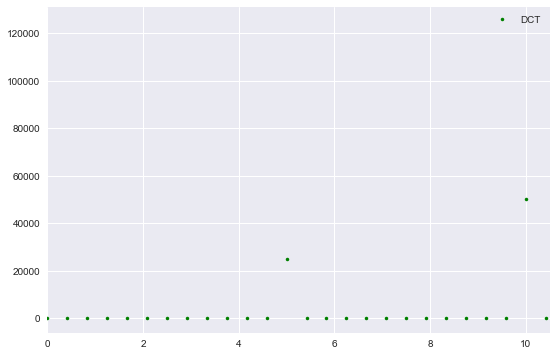

In [20]:
H=scipy.fft.dct(numpy.real(h),type=1)
f=numpy.arange(N)/(N*2*delta_t)

print(f"Amplitude of the zero frequency    : {H[0]:.2f}")
print(f"Amplitude of the lowest frequency  : {H[1]:.2f}")
print(f"Amplitude of the highest frequency : {H[N-1]:.2f}")

# -- A real and even h(t) should yeild real and even H(f)
print("Real?", numpy.all(numpy.isreal(H)))

plot.figure(figsize=(9,6))
plot.plot(f, numpy.abs(H), "g.", linewidth=4, label="DCT")
plot.xlim(0.0,2.1*signal_freq)
plot.legend()
plot.show()
plot.close()

#### Example 2
The sawtooth function is described mathematically as

$$
h(t) = 
\left \{
\begin{array}{lcc}
\frac{t}{T/2},\textrm{ for }0\leq t \leq\frac{T}{2}  \\[10pt]
\frac{t-T}{T/2},\textrm{ for }\frac{T}{2}\leq t\leq T
\end{array}
\right .
$$

It is clearly periodic, nonharmonic, and discontinuous. Even though the general shape of this function can be reproduced with only a few terms of the Fourier components, many components are needed to reproduce the sharp corners. Because the function is odd, the best Fourier is a sine series and if

$$
h(t) = \sum_{n=1}^{\infty}b_n\sin{\left(2\pi f_0nt\right)}
$$

where $f_0$ is the fundamental frequency, then 

$$
b_n= \frac{2}{T}\int_{0}^{T}h(t)\sin{\left(2\pi f_0nt\right)}dt
$$

determines the values

$$
h(t) = \frac{2}{\pi}\left[\sin{\left(2\pi f_0t\right)}-\frac{1}{2}\sin{\left(2\pi 2f_0t\right)}+\frac{1}{3}\sin{\left(2\pi 3f_0t\right)}+\dots\right]
$$

Take the FFT of the sawtooth function and verify there are discrete frequencies with the correct amplitudes.

Length of time   : 1.000 seconds.
Sampling rate    : 16384.000 Hz.


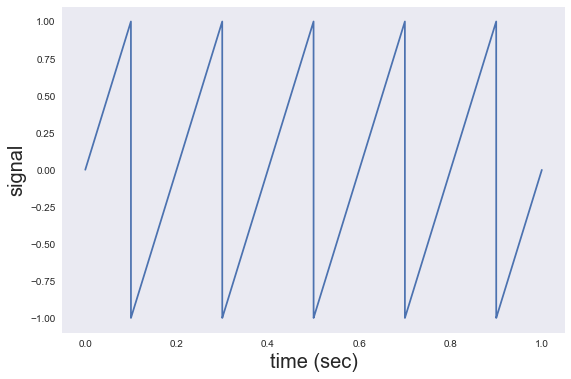

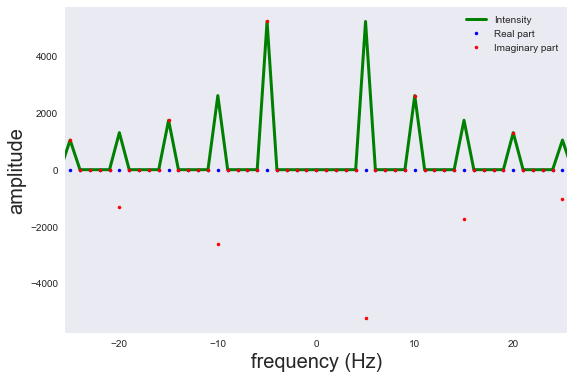

In [21]:
# -- SAW TOOTH FUNCTION
# -- Increasing the N is the only way to sharpen the peaks enough to get
# -- more eaxct FFT.
cycles = 5                      # integer
N = 2**14                  # power of 2
signal_freq = 5                      # Hz

t_min = 0.0                            # sec
t_max = cycles/signal_freq             # sec
t, delta_t = numpy.linspace(
    t_min, t_max, N, retstep=True, endpoint=False)  # sec
sampling_rate = 1.0/delta_t            # Hz
signal_period = 1.0/signal_freq        # sec

print(f"Length of time   : {t_max:4.3f} seconds.")
print(f"Sampling rate    : {sampling_rate:4.3f} Hz.")

# -- Build the signal in this loop
# -- When the time exceeds the period, reset to zero
h = numpy.zeros((N), dtype=complex)
time = 0.0
for i in range(N):
    if time < signal_period/2:
        h[i] = time/(signal_period/2)+0.j
    else:
        h[i] = (time-signal_period)/(signal_period/2)+0.j
    time += delta_t
    if time >= signal_period:
        time = 0.0

plot.figure(figsize=(9, 6))
plot.plot(t, numpy.real(h))
plot.ylabel("signal", fontsize=20)
plot.xlabel("time (sec)", fontsize=20)
plot.grid()
plot.show()
plot.close()

H = scipy.fft.fft(h)
f = scipy.fft.fftfreq(H.size, delta_t)
H = scipy.fft.fftshift(H)
f = scipy.fft.fftshift(f)

plot.figure(figsize=(9, 6))
plot.plot(f, numpy.abs(H), "g-", linewidth=3, label="Intensity")
plot.plot(f, numpy.real(H), "b.", label="Real part")
plot.plot(f, numpy.imag(H), "r.", label="Imaginary part")
plot.xlim(-5.1*signal_freq, 5.1*signal_freq)
plot.ylabel("amplitude", fontsize=20)
plot.xlabel("frequency (Hz)", fontsize=20)
plot.legend()
plot.grid()
plot.show()
plot.close()


Length of time   : 5.115 seconds.
Number of cycles : 25.575 cycles.


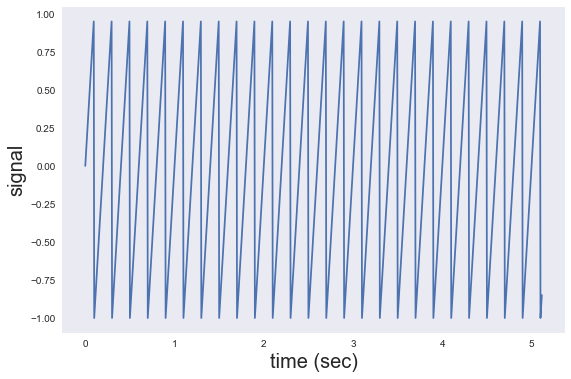

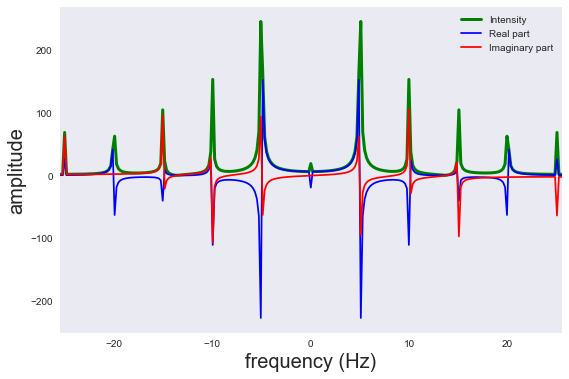

In [22]:
# -- SAW TOOTH FUNCTION
# -- Increasing the N is the only way to get enough cycles
# -- that the peaks are on average sharp enough to get a
# -- more eaxct FFT.
sampling_rate = 200                   # Hz 
delta_t       = 1.0/sampling_rate     # seconds
N             = 2**10                 # power of 2 
signal_freq   = 5                     # Hz
signal_period = 1/signal_freq
 
t_min = 0.0                           # seconds
t_max = (N-1) * delta_t               # seconds                    
t,delta_t = numpy.linspace(t_min,t_max,N,retstep=True)     # seconds
cycles = signal_freq * t_max

print(f"Length of time   : {t_max:4.3f} seconds.")
print(f"Number of cycles : {cycles:4.3f} cycles.")

# -- Build the signal in this loop
# -- When the time exceeds the period, reset to zero
h = numpy.zeros((N),dtype=complex)
time = 0.0
for i in range(N) :
    if time < signal_period/2 :
        h[i] = time/(signal_period/2)+0.j
    else :
        h[i] = (time-signal_period)/(signal_period/2)+0.j
    time += delta_t
    if time>=signal_period :
        time = 0.0

plot.figure(figsize=(9,6))
plot.plot(t,numpy.real(h))
plot.ylabel("signal", fontsize=20)
plot.xlabel("time (sec)", fontsize=20)
plot.grid()
plot.show()
plot.close()

H=scipy.fft.fft(h)
f=scipy.fft.fftfreq(H.size,delta_t)
H=scipy.fft.fftshift(H)
f=scipy.fft.fftshift(f)

plot.figure(figsize=(9,6))
plot.plot(f,numpy.abs(H), "g-", linewidth=3, label="Intensity")
plot.plot(f,numpy.real(H),"b-", label="Real part")
plot.plot(f,numpy.imag(H),"r-", label="Imaginary part")
plot.xlim(-5.1*signal_freq,5.1*signal_freq)
plot.ylabel("amplitude", fontsize=20)
plot.xlabel("frequency (Hz)", fontsize=20)
plot.legend()
plot.grid()
plot.show()
plot.close()

#### Example 3

The file `whale.mp3` contains audio recording from a whale in Glacier Bay Alaska. The data of the sound wave I have saved seperately in the file `whale.dat` using the techniques shown in the next cell. There is also audio files and data files for a violin, and two different bird calls. You can find similar sounds from these websites.
    
    https://www.nps.gov/glba/learn/nature/soundclips.htm
    https://www.xeno-canto.org/

The package `pydub` is installed on the deprtment computers, but not installed by default in Anaconda. If you want to play with this in Anaconda, you will need to install it yourself. In a Anaconda Powershell Prompt, install the packages `pydub` and `ffmpeg`
```bash
conda install pydub
conda install ffmpeg
```

If you don't want to use `pydub` to extract the data, then you can read the data from the `dat` file with the usual `numpy.fromfile` command
```python
data=numpy.fromfile("whale.dat",dtype=numpy.int16)
```

In [23]:
from pydub import AudioSegment
from pathlib import Path

file = Path(r"./whale.mp3")

sound = AudioSegment.from_mp3(file)
# get raw audio data as a bytestring
raw_data = sound.raw_data
# get the frame rate
sample_rate = sound.frame_rate
# get amount of bytes contained in one sample
sample_size = sound.sample_width
# get channels
channels = sound.channels
print("Sample rate         :", sample_rate, "data samples per second")
print("Sample size (bytes) :", sample_size*channels)
# byte size = channels*sample_size, should be two bytes
data = numpy.frombuffer(raw_data, dtype=numpy.int16)
print("Data size           :", data.size)
print("Data shape          :", data.shape)
data.tofile("whale.dat")


Sample rate         : 44100 data samples per second
Sample size (bytes) : 2
Data size           : 2748672
Data shape          : (2748672,)


Note that the data sampling rate is [44,100 Hz][2]. Other sound files will be 44,100 Hz 48,000 Hz.

---
___

A [spectrogram][1]  is a visual representation of the  of the spectrum of frequencies of a signal as it varies with time, and can be used to classify the sounds that animal make, the liguistic sounds of human language, or analyse the overtones of a musical instrument.

A spectrogram is a FFT not of the whole signal $h(t)$, but only of a small window of the signal. Then the window is shifted a small amount in time and the FFT taken again. In the end you have a series of 1D FFT taken at a series of timepoints in the signal. 

First, choose one of the sounds and plot the amplidute of the data. **Do not plot every data point!** For example, there are over 2.7 million data in the file for the whale sounds, which is too much to plot. 

Plot every 100 or 1000 data points. Use the `scipy.signal.spectrogram` method, and make a 2D plot of the spectrogram. Set the window length to be $w=2048$, and the window shift between the FFT to be $\delta=2048/16$. 

[1]: https://en.wikipedia.org/wiki/Spectrogram
[2]: https://en.wikipedia.org/wiki/44,100_Hz

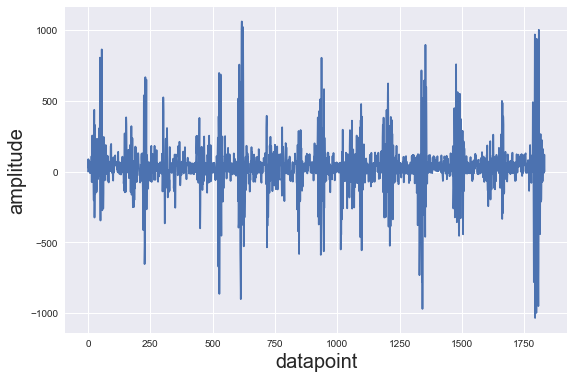

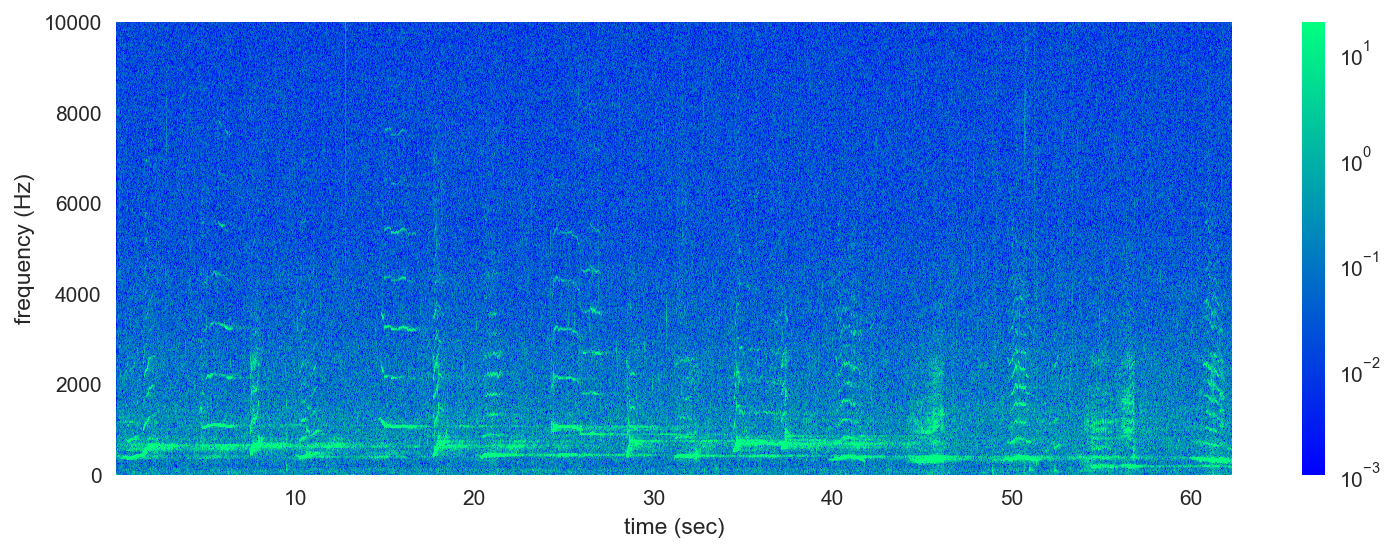

In [24]:
import matplotlib.colors as colors
import matplotlib.ticker as ticker
import scipy.signal

data=numpy.fromfile("whale.dat",dtype=numpy.int16)

plot.figure(figsize=(9,6))
plot.plot(data[::1500])
plot.ylabel("amplitude", fontsize=20)
plot.xlabel("datapoint", fontsize=20)
plot.show()
plot.close()

f, t, Sxx = scipy.signal.spectrogram(data,window=('hamming'),fs=sample_rate, nperseg=2048, noverlap = 2048//16)

cmap1 = plot.get_cmap('winter')
norm1 = colors.LogNorm(Sxx.min()+0.001, Sxx.max()/1000.,clip=True)
plot.figure(num=None,figsize=(12,4), dpi=150, facecolor='w', edgecolor='k')
plot.pcolormesh(t,f,Sxx,cmap=cmap1,norm=norm1,shading='auto')
plot.ylim(0,10000)
#plot.xlim(0,15)
plot.colorbar()
plot.xlabel("time (sec)")
plot.ylabel("frequency (Hz)")
plot.show()
plot.close()

In [25]:
sound = AudioSegment.from_mp3("gull.mp3")
# get raw audio data as a bytestring
raw_data = sound.raw_data
# get the frame rate
sample_rate = sound.frame_rate
# get amount of bytes contained in one sample
sample_size = sound.sample_width
# get channels
channels = sound.channels
print(sample_rate)
print(sample_size*channels)
# byte size = channels*sample_size
data = numpy.frombuffer(raw_data,dtype=numpy.int16)
print(data.size)
print(data.shape)
data.tofile("gull.dat")

48000
2
1055232
(1055232,)


In [26]:
sound = AudioSegment.from_mp3("violin.mp3")
# get raw audio data as a bytestring
raw_data = sound.raw_data
# get the frame rate
sample_rate = sound.frame_rate
# get amount of bytes contained in one sample
sample_size = sound.sample_width
# get channels
channels = sound.channels
print(sample_rate)
print(sample_size*channels)
# byte size = channels*sample_size
data = numpy.frombuffer(raw_data,dtype=numpy.int16)
print(data.size)
print(data.shape)
data.tofile("violin.dat")

44100
2
54144
(54144,)


In [27]:
sound = AudioSegment.from_mp3("sparrow.mp3")
# get raw audio data as a bytestring
raw_data = sound.raw_data
# get the frame rate
sample_rate = sound.frame_rate
# get amount of bytes contained in one sample
sample_size = sound.sample_width
# get channels
channels = sound.channels
print(sample_rate)
print(sample_size*channels)
# byte size = channels*sample_size
data = numpy.frombuffer(raw_data,dtype=numpy.int16)
print(data.size)
print(data.shape)
data.tofile("sparrow.dat")

48000
2
5634432
(5634432,)
